## Function testing

#### **Load dataset**

##### Available dataset:

|No. | Dataset name | Task type|
|----|--------------|----------|
|1 | BACE potency predict| classification|
|2 | BACE pIC50 predict| regression|
|3 | HIV potency predict| classification|
|4 | Molecule solubility predict| regression|
|5 | Molecule lipophilic predict| regression|

*More dataset is coming...*


In [1]:
from helper.load_dataset import load_bace_classification, load_bace_regression, load_esol, load_hiv, load_lipo, load_hdac2, load_fgfr1

In [2]:
# Example of loading dataset

print('BACE potency classification task')
bace_class = load_bace_classification()
print(bace_class.head())


BACE potency classification task
                                              SMILES  Class
0  O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...      1
1  Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...      1
2  S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...      1
3  S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...      1
4  S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...      1


### **Split dataset**

* Default test size: 10% or test 10% and valid 10%

Available split type:

- **Random splitting**
- **Scaffold splitting** (split less frequent scaffold to test set in order to mimic real-world application)

In [2]:
from helper.preprocess import split_train_test, split_train_valid_test

In [6]:
hdac2 = load_bace_classification()

In [4]:
# Train - test split
print('Random Splitting')
print('Train - Test')
bace_train, bace_test = split_train_test(bace_class)
print(f'Train size: {len(bace_train)} | Test size: {len(bace_test)}')

print('Train - Valid - Test')
bace_train, bace_valid, bace_test = split_train_valid_test(bace_class)
print(f'Train size: {len(bace_train)} | Valid size: {len(bace_valid)} |Test size: {len(bace_test)}')

print('________________\n')

print('Scaffold Splitting')
print('Train - Test')
bace_train, bace_test = split_train_test(bace_class, type='scaffold')
print(f'Train size: {len(bace_train)} | Test size: {len(bace_test)}')
print('Train - Valid - Test')
bace_train, bace_valid, bace_test = split_train_valid_test(bace_class, type='scaffold')
print(f'Train size: {len(bace_train)} | Valid size: {len(bace_valid)} |Test size: {len(bace_test)}')


Random Splitting
Train - Test
Train size: 1361 | Test size: 152
Train - Valid - Test
Train size: 1190 | Valid size: 171 |Test size: 152
________________

Scaffold Splitting
Train - Test
Train size: 1361 | Test size: 152
Train - Valid - Test
Train size: 1210 | Valid size: 151 |Test size: 152


### **Generate fingerprint/descriptor**

Available fingerprint/descriptors:

- ECFP (Extended circular fingerprint)
- MACCS (Substructure fingerprint)
- RDKit Descriptors (0D molecular descriptors)
- eRG (extended reduced graph)

In [5]:
from helper.features import smi_ecfp, smi_erg, smi_maccs, smi_rdkitDesc

In [13]:
test_smi = 'c1ccccc1'
print('SMILES to ECFP, default ECFP4, 1024 bits, can change it with radius and n_bits arguments')

test_ecfp = smi_ecfp(test_smi, radius=2, n_bits=1024) # default set ECFP4, 1024 bits
print(f'ECFP arrays: {test_ecfp} \nLength: {len(test_ecfp)}')

print('_____________\n')

print('SMILES to MACCS')
test_maccs = smi_maccs(test_smi)
print(f'MACCS arrays: {test_maccs} \nLength: {len(test_maccs)}')


print('_____________\n')

print('SMILES to RDKit Descriptors')
test_rdkitdesc = smi_rdkitDesc(test_smi)
print(f'RDKit Descriptors arrays: {test_rdkitdesc} \nLength: {len(test_rdkitdesc)}')


print('_____________\n')

print('SMILES to eRG')
test_erg = smi_erg(test_smi)
print(f'ERG arrays: {test_erg} \nLength: {len(test_erg)}')

SMILES to ECFP, default ECFP4, 1024 bits, can change it with radius and n_bits arguments
ECFP arrays: [0. 0. 0. ... 0. 0. 0.] 
Length: 1024
_____________

SMILES to MACCS
MACCS arrays: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0] 
Length: 167
_____________

SMILES to RDKit Descriptors
RDKit Descriptors arrays: [2.0, 2.0, 2.0, 2.0, 0.4426283718993647, 8.0, 78.11399999999999, 72.06599999999999, 78.046950192, 30, 0, -0.062268570782092456, -0.062268570782092456, 0.062268570782092456, 0.062268570782092456, 0.3333333333333333, 0.5, 0.666666666

#### **Generate graph features**

Function to call graph features class and encoding molecule. Might have add more features and different set to work with

In [14]:
from helper.graphfeat import StructureEncoder

In [19]:
graph_generation = StructureEncoder()
graph = graph_generation.encoding_structure('c1ccccc1', 1)
print('Node features:')
print(f'Number of node features: {graph.num_node_features}')
print(graph.x)

print('Edge features:')
print(f'Number of edge features: {graph.num_edge_features}')
print(graph.edge_attr)

Node features:
Number of node features: 47
tensor([[ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.5000,
          1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000, -0.0623,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.5000,
          1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000, -0.0623,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
 

OVER-SMOOTHING ANALYSIS FOR ALL ENCODERS

Analyzing EncoderV1...
✓ EncoderV1 completed (Features: 33)

Analyzing EncoderV2...
✓ EncoderV2 completed (Features: 50)

Analyzing EncoderV3...
✓ EncoderV3 completed (Features: 34)

Analyzing EncoderV4...
✓ EncoderV4 completed (Features: 47)

Analyzing EncoderV5...
✓ EncoderV5 completed (Features: 53)

✓ Plot saved to 'results/oversmoothing_encoder_comparison.png'

OVER-SMOOTHING SUMMARY
+-----------+------------+------------+-------------+-------------+------------+-------------+-------------+------------+-------------+-------------+
| Encoder   |   Features |   MAD (L0) |   MAD (L10) | MAD Decay   |   Var (L0) |   Var (L10) | Var Decay   |   Sep (L0) |   Sep (L10) | Sep Decay   |
+===========+============+============+=============+=============+============+=============+=============+============+=============+=============+
| EncoderV1 |         33 |     2.0117 |      3.2091 | -59.5%      |     0.0742 |      0.453  | -510.2%     |     1.0

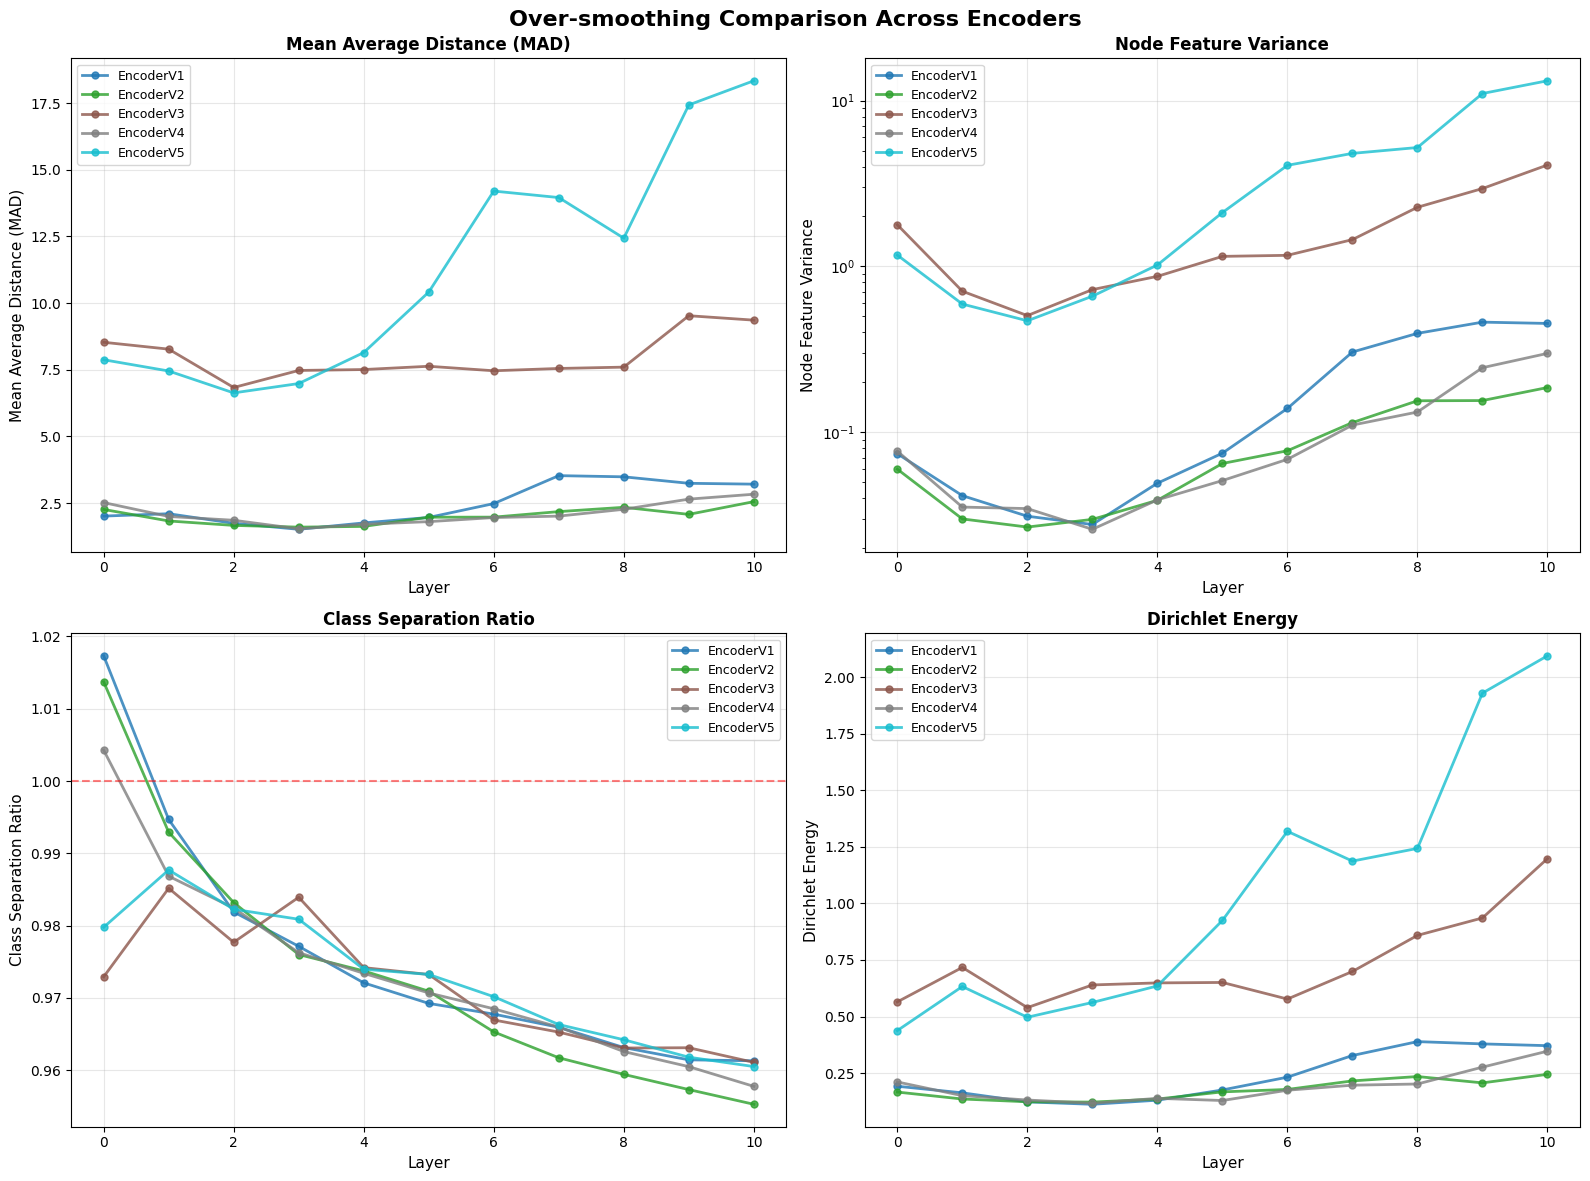

In [19]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GraphConv, global_max_pool, global_mean_pool
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from helper.load_dataset import load_bace_classification
from helper.preprocess import split_train_valid_test, generate_graph_dataset
from helper.graphfeat import StructureEncoderV1, StructureEncoderV2, StructureEncoderV3, StructureEncoderV4, StructureEncoderV5

# Load data
bace = load_bace_classification()
train, valid, test = split_train_valid_test(bace, type='random')

# Define encoders
encoders = {
    'EncoderV1': StructureEncoderV1(directed=False),
    'EncoderV2': StructureEncoderV2(directed=False),
    'EncoderV3': StructureEncoderV3(directed=False),
    'EncoderV4': StructureEncoderV4(directed=False),
    'EncoderV5': StructureEncoderV5(directed=False)
}

# Fixed parameters
MAX_LAYERS = 10  # Analyze up to 10 layers

class GraphConvAnalyzer(nn.Module):
    """GNN that captures embeddings at each layer for over-smoothing analysis"""
    def __init__(self, num_node_features, hidden_channels=64, num_layers=10):
        super(GraphConvAnalyzer, self).__init__()
        self.num_layers = num_layers
        
        self.convs = nn.ModuleList()
        self.convs.append(GraphConv(num_node_features, hidden_channels, bias=True))
        for _ in range(num_layers-1):
            self.convs.append(GraphConv(hidden_channels, hidden_channels, bias=True))
    
    def forward(self, x, edge_index, batch, edge_weight=None):
        """Returns embeddings at each layer"""
        layer_embeddings = [x]
        
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index, edge_weight=edge_weight)
            x = F.relu(x)
            layer_embeddings.append(x)
        
        return layer_embeddings


def calculate_oversmoothing_metrics(layer_embeddings, batch, graph_labels):
    """Calculate over-smoothing metrics for each layer
    
    Args:
        layer_embeddings: List of node embeddings per layer
        batch: Batch assignment for each node
        graph_labels: Labels for each graph in the batch (not per node)
    """
    metrics = {
        'mad': [],  # Mean Average Distance
        'variance': [],  # Node feature variance
        'class_separation': [],  # Inter-class / intra-class distance
        'dirichlet_energy': []  # Graph smoothness
    }
    
    batch_np = batch.detach().cpu().numpy()
    graph_labels_np = graph_labels.detach().cpu().numpy()
    
    for layer_idx, embeddings in enumerate(layer_embeddings):
        embeddings_np = embeddings.detach().cpu().numpy()
        
        # 1. Mean Average Distance (MAD) - node level
        distances = []
        n_samples = min(500, len(embeddings_np))
        indices = np.random.choice(len(embeddings_np), n_samples, replace=False)
        for i in range(len(indices)):
            for j in range(i+1, min(i+50, len(indices))):  # Limit pairs for efficiency
                dist = np.linalg.norm(embeddings_np[indices[i]] - embeddings_np[indices[j]])
                distances.append(dist)
        mad = np.mean(distances) if distances else 0
        metrics['mad'].append(mad)
        
        # 2. Node feature variance
        variance = np.mean(np.var(embeddings_np, axis=0))
        metrics['variance'].append(variance)
        
        # 3. Class separation (graph-level)
        unique_graphs = np.unique(batch_np)
        graph_embeddings = []
        
        for graph_id in unique_graphs:
            mask = batch_np == graph_id
            graph_emb = embeddings_np[mask].mean(axis=0)
            graph_embeddings.append(graph_emb)
        
        graph_embeddings = np.array(graph_embeddings)
        
        # Calculate inter-class and intra-class distances
        inter_class = []
        intra_class = []
        
        for i in range(len(graph_embeddings)):
            for j in range(i+1, len(graph_embeddings)):
                dist = np.linalg.norm(graph_embeddings[i] - graph_embeddings[j])
                if graph_labels_np[i] == graph_labels_np[j]:
                    intra_class.append(dist)
                else:
                    inter_class.append(dist)
        
        if len(intra_class) > 0 and len(inter_class) > 0:
            separation = np.mean(inter_class) / (np.mean(intra_class) + 1e-8)
        else:
            separation = 0
        metrics['class_separation'].append(separation)
        
        # 4. Dirichlet energy (embedding smoothness)
        energy = np.mean(np.std(embeddings_np, axis=0))
        metrics['dirichlet_energy'].append(energy)
    
    return metrics


def analyze_encoder_oversmoothing(encoder_name, encoder, data, batch_size=32):
    """Analyze over-smoothing for a specific encoder"""
    print(f"\nAnalyzing {encoder_name}...")
    
    # Generate dataset
    dataset = generate_graph_dataset(data, 'SMILES', 'Class', encoder=encoder)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model
    num_node_features = dataset.num_node_features
    model = GraphConvAnalyzer(num_node_features, hidden_channels=64, num_layers=MAX_LAYERS)
    model.eval()
    
    all_metrics = {
        'mad': [[] for _ in range(MAX_LAYERS + 1)],
        'variance': [[] for _ in range(MAX_LAYERS + 1)],
        'class_separation': [[] for _ in range(MAX_LAYERS + 1)],
        'dirichlet_energy': [[] for _ in range(MAX_LAYERS + 1)]
    }
    
    # Collect metrics across all batches
    with torch.no_grad():
        for batch_data in loader:
            x = batch_data.x
            edge_index = batch_data.edge_index
            edge_weight = batch_data.edge_weight if hasattr(batch_data, 'edge_weight') else None
            batch = batch_data.batch
            graph_labels = batch_data.y  # These are graph-level labels
            
            # Get embeddings at each layer
            layer_embeddings = model(x, edge_index, batch, edge_weight)
            
            # Calculate metrics for this batch
            batch_metrics = calculate_oversmoothing_metrics(layer_embeddings, batch, graph_labels)
            
            # Aggregate
            for metric_name in all_metrics.keys():
                for layer_idx in range(len(batch_metrics[metric_name])):
                    all_metrics[metric_name][layer_idx].append(batch_metrics[metric_name][layer_idx])
    
    # Average across batches
    avg_metrics = {}
    for metric_name in all_metrics.keys():
        avg_metrics[metric_name] = [np.mean(layer_values) for layer_values in all_metrics[metric_name]]
    
    return avg_metrics, num_node_features


# Analyze all encoders
print("="*80)
print("OVER-SMOOTHING ANALYSIS FOR ALL ENCODERS")
print("="*80)

all_results = {}
for encoder_name, encoder in encoders.items():
    try:
        metrics, num_features = analyze_encoder_oversmoothing(encoder_name, encoder, test, batch_size=128)
        all_results[encoder_name] = {
            'metrics': metrics,
            'num_features': num_features
        }
        print(f"✓ {encoder_name} completed (Features: {num_features})")
    except Exception as e:
        print(f"✗ Error with {encoder_name}: {str(e)}")


# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Over-smoothing Comparison Across Encoders', fontsize=16, fontweight='bold')

colors = plt.cm.tab10(np.linspace(0, 1, len(all_results)))
layers = list(range(MAX_LAYERS + 1))

metric_configs = [
    ('mad', 'Mean Average Distance (MAD)', axes[0, 0], False),
    ('variance', 'Node Feature Variance', axes[0, 1], True),
    ('class_separation', 'Class Separation Ratio', axes[1, 0], False),
    ('dirichlet_energy', 'Dirichlet Energy', axes[1, 1], False)
]

for metric_name, title, ax, use_log in metric_configs:
    for idx, (encoder_name, result) in enumerate(all_results.items()):
        values = result['metrics'][metric_name]
        ax.plot(layers, values, 'o-', linewidth=2, markersize=5, 
                color=colors[idx], label=encoder_name, alpha=0.8)
    
    ax.set_xlabel('Layer', fontsize=11)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    if use_log:
        ax.set_yscale('log')
    
    # Add reference line for class separation
    if metric_name == 'class_separation':
        ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='No separation')

plt.tight_layout()
plt.savefig('results/oversmoothing_encoder_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved to 'results/oversmoothing_encoder_comparison.png'")

# Create summary table
print("\n" + "="*80)
print("OVER-SMOOTHING SUMMARY")
print("="*80)

summary_data = []
for encoder_name, result in all_results.items():
    metrics = result['metrics']
    
    # Calculate degradation rates (how much metrics change from layer 0 to final layer)
    mad_decay = (metrics['mad'][0] - metrics['mad'][-1]) / metrics['mad'][0] * 100
    var_decay = (metrics['variance'][0] - metrics['variance'][-1]) / metrics['variance'][0] * 100
    sep_decay = (metrics['class_separation'][0] - metrics['class_separation'][-1]) / metrics['class_separation'][0] * 100
    
    summary_data.append([
        encoder_name,
        result['num_features'],
        f"{metrics['mad'][0]:.4f}",
        f"{metrics['mad'][-1]:.4f}",
        f"{mad_decay:.1f}%",
        f"{metrics['variance'][0]:.4f}",
        f"{metrics['variance'][-1]:.4f}",
        f"{var_decay:.1f}%",
        f"{metrics['class_separation'][0]:.4f}",
        f"{metrics['class_separation'][-1]:.4f}",
        f"{sep_decay:.1f}%"
    ])

summary_header = [
    'Encoder', 'Features',
    'MAD (L0)', 'MAD (L10)', 'MAD Decay',
    'Var (L0)', 'Var (L10)', 'Var Decay',
    'Sep (L0)', 'Sep (L10)', 'Sep Decay'
]

print(tabulate(summary_data, headers=summary_header, tablefmt='grid'))

# Rank encoders by over-smoothing resistance
print("\n" + "="*80)
print("RANKING BY OVER-SMOOTHING RESISTANCE")
print("="*80)
print("(Lower MAD decay = better resistance to over-smoothing)")

ranking_data = []
for encoder_name, result in all_results.items():
    metrics = result['metrics']
    mad_decay = (metrics['mad'][0] - metrics['mad'][-1]) / metrics['mad'][0] * 100
    var_decay = (metrics['variance'][0] - metrics['variance'][-1]) / metrics['variance'][0] * 100
    
    # Combined score (lower is better)
    combined_score = (mad_decay + var_decay) / 2
    
    ranking_data.append({
        'encoder': encoder_name,
        'mad_decay': mad_decay,
        'var_decay': var_decay,
        'combined_score': combined_score
    })

ranking_data = sorted(ranking_data, key=lambda x: x['combined_score'])

rank_table = []
for rank, item in enumerate(ranking_data, 1):
    rank_table.append([
        rank,
        item['encoder'],
        f"{item['mad_decay']:.2f}%",
        f"{item['var_decay']:.2f}%",
        f"{item['combined_score']:.2f}"
    ])

rank_header = ['Rank', 'Encoder', 'MAD Decay', 'Variance Decay', 'Combined Score']
print(tabulate(rank_table, headers=rank_header, tablefmt='grid'))

# Save results
with open('results/oversmoothing_analysis.txt', 'w') as file:
    file.write('OVER-SMOOTHING ANALYSIS FOR BACE DATASET\n')
    file.write('='*80 + '\n\n')
    file.write('Summary Table:\n')
    file.write(tabulate(summary_data, headers=summary_header, tablefmt='grid'))
    file.write('\n\nRanking by Over-smoothing Resistance:\n')
    file.write(tabulate(rank_table, headers=rank_header, tablefmt='grid'))
    file.write(f'\n\nBest Encoder: {ranking_data[0]["encoder"]} with combined score: {ranking_data[0]["combined_score"]:.2f}')

print("\n✓ Results saved to 'results/oversmoothing_analysis.txt'")
print(f"\n{'='*80}")
print(f"Best Encoder (Most Resistant to Over-smoothing): {ranking_data[0]['encoder']}")
print(f"{'='*80}")

Random seed set to 0 for reproducibility
OVER-SMOOTHING ANALYSIS FOR ALL ENCODERS

Analyzing EncoderV1...
✓ EncoderV1 completed (Features: 33)

Analyzing EncoderV2...
✓ EncoderV2 completed (Features: 50)

Analyzing EncoderV3...
✓ EncoderV3 completed (Features: 34)

Analyzing EncoderV4...
✓ EncoderV4 completed (Features: 47)

Analyzing EncoderV5...
✓ EncoderV5 completed (Features: 53)

✓ Plot saved to 'results/oversmoothing_encoder_comparison.png'

OVER-SMOOTHING SUMMARY
+-----------+------------+------------+-------------+-------------+------------+-------------+-------------+------------+-------------+-------------+
| Encoder   |   Features |   MAD (L0) |   MAD (L10) | MAD Decay   |   Var (L0) |   Var (L10) | Var Decay   |   Sep (L0) |   Sep (L10) | Sep Decay   |
+===========+============+============+=============+=============+============+=============+=============+============+=============+=============+
| EncoderV1 |         33 |     2.0115 |      4.7433 | -135.8%     |     0.0

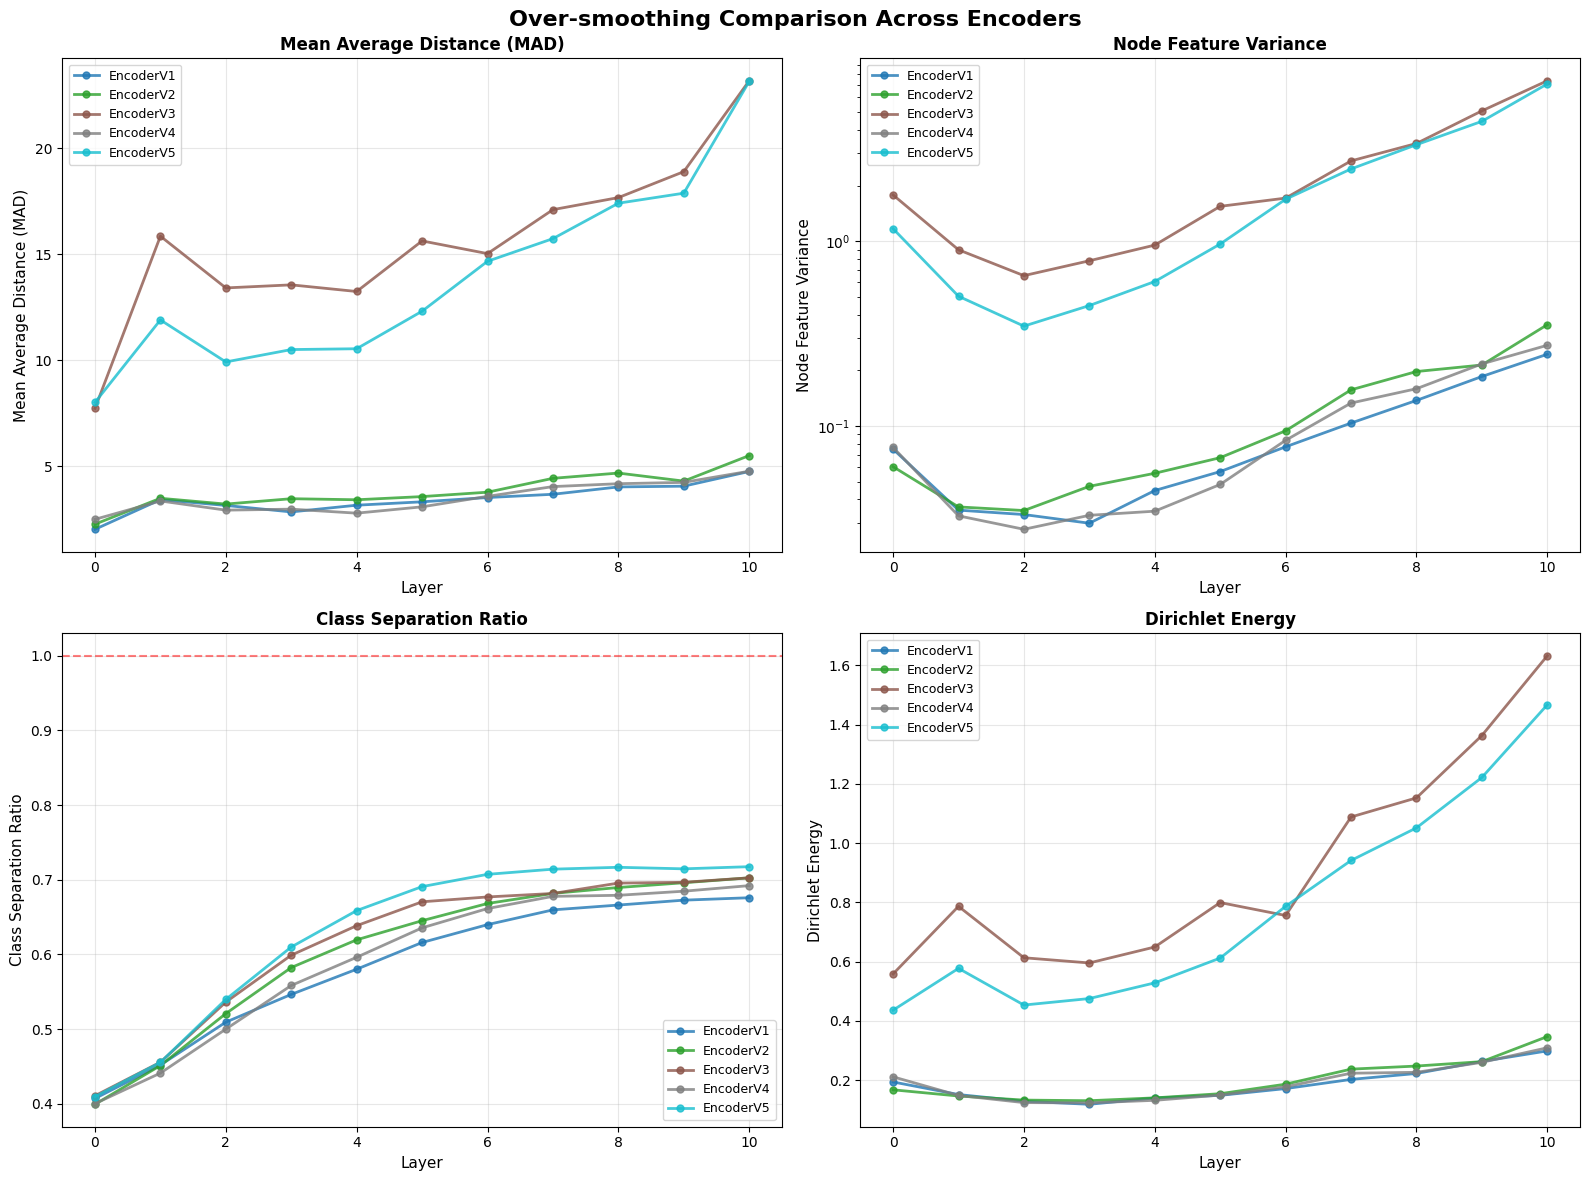

In [24]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GraphConv, global_max_pool, global_mean_pool
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from helper.load_dataset import load_bace_classification
from helper.preprocess import split_train_valid_test, generate_graph_dataset
from helper.graphfeat import StructureEncoderV1, StructureEncoderV2, StructureEncoderV3, StructureEncoderV4, StructureEncoderV5
import random

# Set random seeds for reproducibility
SEED = 0

def set_seed(seed=SEED):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
set_seed(SEED)
print(f"Random seed set to {SEED} for reproducibility")

# Load data
bace = load_bace_classification()
train, valid, test = split_train_valid_test(bace, type='scaffold')

# Define encoders
encoders = {
    'EncoderV1': StructureEncoderV1(directed=False),
    'EncoderV2': StructureEncoderV2(directed=False),
    'EncoderV3': StructureEncoderV3(directed=False),
    'EncoderV4': StructureEncoderV4(directed=False),
    'EncoderV5': StructureEncoderV5(directed=False)
}

# Fixed parameters
MAX_LAYERS = 10  # Analyze up to 10 layers

class GraphConvAnalyzer(nn.Module):
    """GNN that captures embeddings at each layer for over-smoothing analysis"""
    def __init__(self, num_node_features, hidden_channels=192, num_layers=10):
        super(GraphConvAnalyzer, self).__init__()
        self.num_layers = num_layers
        
        self.convs = nn.ModuleList()
        self.convs.append(GraphConv(num_node_features, hidden_channels, bias=True))
        for _ in range(num_layers-1):
            self.convs.append(GraphConv(hidden_channels, hidden_channels, bias=True))
    
    def forward(self, x, edge_index, batch, edge_weight=None):
        """Returns embeddings at each layer"""
        layer_embeddings = [x]
        
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index, edge_weight=edge_weight)
            x = F.relu(x)
            layer_embeddings.append(x)
        
        return layer_embeddings


def calculate_oversmoothing_metrics(layer_embeddings, batch, graph_labels):
    """Calculate over-smoothing metrics for each layer
    
    Args:
        layer_embeddings: List of node embeddings per layer
        batch: Batch assignment for each node
        graph_labels: Labels for each graph in the batch (not per node)
    """
    metrics = {
        'mad': [],  # Mean Average Distance
        'variance': [],  # Node feature variance
        'class_separation': [],  # Inter-class / intra-class distance
        'dirichlet_energy': []  # Graph smoothness
    }
    
    batch_np = batch.detach().cpu().numpy()
    graph_labels_np = graph_labels.detach().cpu().numpy()
    
    for layer_idx, embeddings in enumerate(layer_embeddings):
        embeddings_np = embeddings.detach().cpu().numpy()
        
        # 1. Mean Average Distance (MAD) - node level
        distances = []
        n_samples = min(500, len(embeddings_np))
        indices = np.random.choice(len(embeddings_np), n_samples, replace=False)
        for i in range(len(indices)):
            for j in range(i+1, min(i+50, len(indices))):  # Limit pairs for efficiency
                dist = np.linalg.norm(embeddings_np[indices[i]] - embeddings_np[indices[j]])
                distances.append(dist)
        mad = np.mean(distances) if distances else 0
        metrics['mad'].append(mad)
        
        # 2. Node feature variance
        variance = np.mean(np.var(embeddings_np, axis=0))
        metrics['variance'].append(variance)
        
        # 3. Class separation (graph-level)
        unique_graphs = np.unique(batch_np)
        graph_embeddings = []
        
        for graph_id in unique_graphs:
            mask = batch_np == graph_id
            graph_emb = embeddings_np[mask].mean(axis=0)
            graph_embeddings.append(graph_emb)
        
        graph_embeddings = np.array(graph_embeddings)
        
        # Calculate inter-class and intra-class distances
        inter_class = []
        intra_class = []
        
        for i in range(len(graph_embeddings)):
            for j in range(i+1, len(graph_embeddings)):
                dist = np.linalg.norm(graph_embeddings[i] - graph_embeddings[j])
                if graph_labels_np[i] == graph_labels_np[j]:
                    intra_class.append(dist)
                else:
                    inter_class.append(dist)
        
        if len(intra_class) > 0 and len(inter_class) > 0:
            separation = np.mean(inter_class) / (np.mean(intra_class) + 1e-8)
        else:
            separation = 0
        metrics['class_separation'].append(separation)
        
        # 4. Dirichlet energy (embedding smoothness)
        energy = np.mean(np.std(embeddings_np, axis=0))
        metrics['dirichlet_energy'].append(energy)
    
    return metrics


def analyze_encoder_oversmoothing(encoder_name, encoder, data, batch_size=128, seed=42):
    """Analyze over-smoothing for a specific encoder"""
    print(f"\nAnalyzing {encoder_name}...")
    
    # Set seed for this encoder analysis
    set_seed(seed)
    
    # Generate dataset
    dataset = generate_graph_dataset(data, 'SMILES', 'Class', encoder=encoder)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model
    num_node_features = dataset.num_node_features
    model = GraphConvAnalyzer(num_node_features, hidden_channels=192, num_layers=MAX_LAYERS)
    model.eval()
    
    all_metrics = {
        'mad': [[] for _ in range(MAX_LAYERS + 1)],
        'variance': [[] for _ in range(MAX_LAYERS + 1)],
        'class_separation': [[] for _ in range(MAX_LAYERS + 1)],
        'dirichlet_energy': [[] for _ in range(MAX_LAYERS + 1)]
    }
    
    # Collect metrics across all batches
    with torch.no_grad():
        for batch_data in loader:
            x = batch_data.x
            edge_index = batch_data.edge_index
            edge_weight = batch_data.edge_weight if hasattr(batch_data, 'edge_weight') else None
            batch = batch_data.batch
            graph_labels = batch_data.y  # These are graph-level labels
            
            # Get embeddings at each layer
            layer_embeddings = model(x, edge_index, batch, edge_weight)
            
            # Calculate metrics for this batch
            batch_metrics = calculate_oversmoothing_metrics(layer_embeddings, batch, graph_labels)
            
            # Aggregate
            for metric_name in all_metrics.keys():
                for layer_idx in range(len(batch_metrics[metric_name])):
                    all_metrics[metric_name][layer_idx].append(batch_metrics[metric_name][layer_idx])
    
    # Average across batches
    avg_metrics = {}
    for metric_name in all_metrics.keys():
        avg_metrics[metric_name] = [np.mean(layer_values) for layer_values in all_metrics[metric_name]]
    
    return avg_metrics, num_node_features


# Analyze all encoders
print("="*80)
print("OVER-SMOOTHING ANALYSIS FOR ALL ENCODERS")
print("="*80)

all_results = {}
for encoder_name, encoder in encoders.items():
    try:
        metrics, num_features = analyze_encoder_oversmoothing(encoder_name, encoder, test, batch_size=32, seed=SEED)
        all_results[encoder_name] = {
            'metrics': metrics,
            'num_features': num_features
        }
        print(f"✓ {encoder_name} completed (Features: {num_features})")
    except Exception as e:
        print(f"✗ Error with {encoder_name}: {str(e)}")


# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Over-smoothing Comparison Across Encoders', fontsize=16, fontweight='bold')

colors = plt.cm.tab10(np.linspace(0, 1, len(all_results)))
layers = list(range(MAX_LAYERS + 1))

metric_configs = [
    ('mad', 'Mean Average Distance (MAD)', axes[0, 0], False),
    ('variance', 'Node Feature Variance', axes[0, 1], True),
    ('class_separation', 'Class Separation Ratio', axes[1, 0], False),
    ('dirichlet_energy', 'Dirichlet Energy', axes[1, 1], False)
]

for metric_name, title, ax, use_log in metric_configs:
    for idx, (encoder_name, result) in enumerate(all_results.items()):
        values = result['metrics'][metric_name]
        ax.plot(layers, values, 'o-', linewidth=2, markersize=5, 
                color=colors[idx], label=encoder_name, alpha=0.8)
    
    ax.set_xlabel('Layer', fontsize=11)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    if use_log:
        ax.set_yscale('log')
    
    # Add reference line for class separation
    if metric_name == 'class_separation':
        ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='No separation')

plt.tight_layout()
plt.savefig('results/oversmoothing_encoder_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved to 'results/oversmoothing_encoder_comparison.png'")

# Create summary table
print("\n" + "="*80)
print("OVER-SMOOTHING SUMMARY")
print("="*80)

summary_data = []
for encoder_name, result in all_results.items():
    metrics = result['metrics']
    
    # Calculate degradation rates (how much metrics change from layer 0 to final layer)
    mad_decay = (metrics['mad'][0] - metrics['mad'][-1]) / metrics['mad'][0] * 100
    var_decay = (metrics['variance'][0] - metrics['variance'][-1]) / metrics['variance'][0] * 100
    sep_decay = (metrics['class_separation'][0] - metrics['class_separation'][-1]) / metrics['class_separation'][0] * 100
    
    summary_data.append([
        encoder_name,
        result['num_features'],
        f"{metrics['mad'][0]:.4f}",
        f"{metrics['mad'][-1]:.4f}",
        f"{mad_decay:.1f}%",
        f"{metrics['variance'][0]:.4f}",
        f"{metrics['variance'][-1]:.4f}",
        f"{var_decay:.1f}%",
        f"{metrics['class_separation'][0]:.4f}",
        f"{metrics['class_separation'][-1]:.4f}",
        f"{sep_decay:.1f}%"
    ])

summary_header = [
    'Encoder', 'Features',
    'MAD (L0)', 'MAD (L10)', 'MAD Decay',
    'Var (L0)', 'Var (L10)', 'Var Decay',
    'Sep (L0)', 'Sep (L10)', 'Sep Decay'
]

print(tabulate(summary_data, headers=summary_header, tablefmt='grid'))

# Rank encoders by over-smoothing resistance
print("\n" + "="*80)
print("RANKING BY OVER-SMOOTHING RESISTANCE")
print("="*80)
print("(Lower MAD decay = better resistance to over-smoothing)")

ranking_data = []
for encoder_name, result in all_results.items():
    metrics = result['metrics']
    mad_decay = (metrics['mad'][0] - metrics['mad'][-1]) / metrics['mad'][0] * 100
    var_decay = (metrics['variance'][0] - metrics['variance'][-1]) / metrics['variance'][0] * 100
    
    # Combined score (lower is better)
    combined_score = (mad_decay + var_decay) / 2
    
    ranking_data.append({
        'encoder': encoder_name,
        'mad_decay': mad_decay,
        'var_decay': var_decay,
        'combined_score': combined_score
    })

ranking_data = sorted(ranking_data, key=lambda x: x['combined_score'])

rank_table = []
for rank, item in enumerate(ranking_data, 1):
    rank_table.append([
        rank,
        item['encoder'],
        f"{item['mad_decay']:.2f}%",
        f"{item['var_decay']:.2f}%",
        f"{item['combined_score']:.2f}"
    ])

rank_header = ['Rank', 'Encoder', 'MAD Decay', 'Variance Decay', 'Combined Score']
print(tabulate(rank_table, headers=rank_header, tablefmt='grid'))

# Save results
with open('results/oversmoothing_analysis.txt', 'w') as file:
    file.write('OVER-SMOOTHING ANALYSIS FOR BACE DATASET\n')
    file.write(f'Random Seed: {SEED}\n')
    file.write('='*80 + '\n\n')
    file.write('Summary Table:\n')
    file.write(tabulate(summary_data, headers=summary_header, tablefmt='grid'))
    file.write('\n\nRanking by Over-smoothing Resistance:\n')
    file.write(tabulate(rank_table, headers=rank_header, tablefmt='grid'))
    file.write(f'\n\nBest Encoder: {ranking_data[0]["encoder"]} with combined score: {ranking_data[0]["combined_score"]:.2f}')

print("\n✓ Results saved to 'results/oversmoothing_analysis.txt'")
print(f"\n{'='*80}")
print(f"Best Encoder (Most Resistant to Over-smoothing): {ranking_data[0]['encoder']}")
print(f"Random Seed: {SEED}")
print(f"{'='*80}")